## **Bootcamp: Ciencia de Datos e Inteligencia Artificial**
## **Proyecto del Módulo 7: Técnicas avanzadas para ciencia de datos y empleabilidad**

Hola, ya es el último proyecto, has avanzado y aprendido mucho hasta acá. ¡Muchas felicidades!

Es hora de poner en práctica todo lo que hemos aprendido a lo largo de nuestra travesía.

Lee el proyecto y revisa con cuidado cada una de las instrucciones. Procura plasmar todo tu potencial para que lo concluyas de manera sobresaliente.

¡Éxito!

# Objetivos
- Aplicar con éxito todos los conocimientos que has adquirido a lo largo del Bootcamp.
- Consolidar las técnicas de limpieza, entrenamiento, graficación y ajuste a modelos de *Machine Learning*.
- Generar una API que brinde predicciones como resultado a partir de datos enviados.


# Proyecto

1. Selecciona uno de los siguientes *datasets*:
  - Imágenes de rayos X de pecho para detectar neumonía: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia
  - *Reviews* de aplicaciones de la Google Play Store: https://www.kaggle.com/datasets/lava18/google-play-store-apps
  - Estadísticas demográficas de los ganadores del premio Oscar de la Academia: https://www.kaggle.com/datasets/fmejia21/demographics-of-academy-awards-oscars-winners
  - Aspiraciones profesionales de la generación Z: https://www.kaggle.com/datasets/kulturehire/understanding-career-aspirations-of-genz

Cada uno representa un *dataset*, un problema y una forma diferente de abordarlo. Tu tarea es identificar las técnicas y modelos que podrías usar para tu proyecto.

2. Debes hacer un análisis exploratorio y limpieza de los datos. Usa las ténicas que creas convenientes.

3. Entrena el modelo de *Machine Learning*, procesamiento de lenguaje natural o red neuronal que creas adecuado.

4. Genera por lo menos dos gráficas y dos métricas de rendimiento; explica las puntuaciones de rendimiento que amerite tu problema. Todas las gráficas de rendimiento que realices deben tener leyendas, colores y títulos personalizados por ti.

  - Además, antes de subir el modelo a "producción", deberás realizar un proceso de ensambles (*ensemblings*) y de ajuste de hiperparámetros o *tuning* para intentar mejorar la precisión y disminuir la varianza de tu modelo.

5. Construye una API REST en la que cualquier usuario pueda mandar datos y que esta misma devuelva la predicción del modelo que has hecho. La API debe estar en la nube, ya sea en un servicio como Netlify o Ngrok, para que pueda ser consultada desde internet.

6. Genera una presentación del problema y del modelo de solución que planteas. Muestra gráficas, datos de rendimiento y explicaciones. Esta presentación debe estar enfocada a personas que no sepan mucho de ciencia de datos e inteligencia artificial.

7. **Solamente se recibirán trabajos subidos a tu cuenta de GitHub con un README.md apropiado que explique tu proyecto**.

## Criterios de evaluación

| Actividad | Porcentaje | Observaciones | Punto parcial
| -- | -- | -- | -- |
| Actividad 1. Limpieza y EDA | 20 | Realiza todas las tareas necesarias para hacer el EDA y la limpieza correcta, dependiendo de la problemática. Debes hacer como mínimo el análisis de completitud, escalamiento (si aplica) y tokenización (si aplica). | Realizaste solo algunas tareas de exploración y limpieza y el modelo se muestra aún con oportunidad de completitud, escalamiento y/o mejora. |
| Actividad 2. Entrenamiento del modelo | 20 | Elige el modelo y algoritmo adecuados para tu problema, entrénalo con los datos ya limpios y genera algunas predicciones de prueba. | No has realizado predicciones de prueba para tu modelo de ML y/o tu modelo muestra una precisión menor al 60 %. |
| Actividad 3. Graficación y métricas | 20 | Genera por lo menos dos gráficas y dos muestras de métricas que permitan visualizar el rendimiento y precisión del modelo que construiste. Además, realizaste los procesos de *tuning* y ensambles adecuados para tu problema. | Las gráficas no tienen leyendas y colores customizados, solo muestras una gráfica o no realizaste el *tuning* de hiperparámetros.
| Actividad 4. API REST | 20 | Generaste con éxito un *link* público en el que, por método POST, se puede mandar información y la API REST devuelve una predicción junto con el porcentaje de confianza de esta misma. | N/A
| Actividad 5. Presentación | 20 | Genera una presentación en la que establezcas como mínimo: el problema, proceso de solución, metodologías usadas, gráficas de rendimiento, demostración del modelo y aprendizajes obtenidos. Debes redactarla con términos que pueda entender cualquier persona, no solo científicos de datos. | La presentación no expone con claridad o en términos coloquiales el proceso de creación del modelo, sus ventajas y muestras de rendimiento.

**Mucho éxito en tu camino como Data Scientist.**

# Parte 1: Seleccion de Dataset

\El dataset seleccionado es el de Estadísticas demográficas de los ganadores del premio Oscar de la Academia

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from imblearn.over_sampling import SMOTE
from collections import Counter

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Proyecto Modulo 7/Oscars-demographics-DFE.csv", encoding='latin-1')

# Parte 2: Analisis exploratorio y limpieza de datos

In [4]:
df.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,birthplace,birthplace:confidence,date_of_birth,date_of_birth:confidence,race_ethnicity,...,award,biourl,birthplace_gold,date_of_birth_gold,movie,person,race_ethnicity_gold,religion_gold,sexual_orientation_gold,year_of_award_gold
0,670454353,False,finalized,3,2/10/15 3:45,"Chisinau, Moldova",1.0,30-Sep-1895,1.0,White,...,Best Director,http://www.nndb.com/people/320/000043191/,NaN,NaN,Two Arabian Knights,Lewis Milestone,NaN,NaN,NaN,NaN
1,670454354,False,finalized,3,2/10/15 2:03,"Glasgow, Scotland",1.0,2-Feb-1886,1.0,White,...,Best Director,http://www.nndb.com/people/626/000042500/,NaN,NaN,The Divine Lady,Frank Lloyd,NaN,NaN,NaN,NaN
2,670454355,False,finalized,3,2/10/15 2:05,"Chisinau, Moldova",1.0,30-Sep-1895,1.0,White,...,Best Director,http://www.nndb.com/people/320/000043191/,NaN,NaN,All Quiet on the Western Front,Lewis Milestone,NaN,NaN,NaN,NaN
3,670454356,False,finalized,3,2/10/15 2:04,"Chicago, Il",1.0,23-Feb-1899,1.0,White,...,Best Director,http://www.nndb.com/people/544/000041421/,NaN,NaN,Skippy,Norman Taurog,NaN,NaN,NaN,NaN
4,670454357,False,finalized,3,2/10/15 1:48,"Salt Lake City, Ut",1.0,23-Apr-1894,1.0,White,...,Best Director,http://www.nndb.com/people/292/000044160/,NaN,NaN,Bad Girl,Frank Borzage,NaN,NaN,NaN,NaN


In [5]:
df.shape

(441, 27)

In [6]:
# vemos valores nulos
df.isnull().sum()

,0
_unit_id,0
_golden,0
_unit_state,0
_trusted_judgments,0
_last_judgment_at,25
birthplace,0
birthplace:confidence,0
date_of_birth,0
date_of_birth:confidence,0
race_ethnicity,0


Se observa que hay columbaas que tienen un alto porcentaje de valores faltantes, por lo que se eliminaran.
Se procede ademas de eliminar las columnas "biourl" y "religion" ya que en un análisis demográfico no son escenciales.

In [7]:
df.describe()

,_unit_id,_trusted_judgments,birthplace:confidence,date_of_birth:confidence,race_ethnicity:confidence,religion:confidence,sexual_orientation:confidence,year_of_award,year_of_award:confidence,year_of_award_gold
count,4.410000e+02,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,11.000000
mean,6.704825e+08,7.637188,0.995259,0.996607,0.999130,0.989373,0.992390,1973.165533,0.990082,1977.363636
std,1.139974e+05,19.015541,0.038917,0.032060,0.016438,0.065610,0.049458,24.030895,0.059177,21.592928
min,6.704544e+08,3.000000,0.657100,0.656200,0.657100,0.333300,0.657100,1927.000000,0.333300,1942.000000
25%,6.704545e+08,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1953.000000,1.000000,1964.000000
50%,6.704546e+08,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1973.000000,1.000000,1977.000000
75%,6.704547e+08,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1994.000000,1.000000,1997.000000
max,6.709729e+08,95.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2014.000000,1.000000,2006.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 441 entries, 0 to 440
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   _unit_id                       441 non-null    int64  
 1   _golden                        441 non-null    bool   
 2   _unit_state                    441 non-null    object 
 3   _trusted_judgments             441 non-null    int64  
 4   _last_judgment_at              416 non-null    object 
 5   birthplace                     441 non-null    object 
 6   birthplace:confidence          441 non-null    float64
 7   date_of_birth                  441 non-null    object 
 8   date_of_birth:confidence       441 non-null    float64
 9   race_ethnicity                 441 non-null    object 
 10  race_ethnicity:confidence      441 non-null    float64
 11  religion                       441 non-null    object 
 12  religion:confidence            441 non-null    flo

Las columnas con el sufijo "_gold" tienen casi el 100% de faltantes.

## Eliminación de columnas

### Columnas con fatos insuficientes, irrrelevantes o redundantes (columnas "confidence")

In [9]:
df = df.drop(columns=[
    "birthplace_gold",
    "date_of_birth_gold",
    "race_ethnicity_gold",
    "religion_gold",
    "sexual_orientation_gold",
    "year_of_award_gold"
])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 441 entries, 0 to 440
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   _unit_id                       441 non-null    int64  
 1   _golden                        441 non-null    bool   
 2   _unit_state                    441 non-null    object 
 3   _trusted_judgments             441 non-null    int64  
 4   _last_judgment_at              416 non-null    object 
 5   birthplace                     441 non-null    object 
 6   birthplace:confidence          441 non-null    float64
 7   date_of_birth                  441 non-null    object 
 8   date_of_birth:confidence       441 non-null    float64
 9   race_ethnicity                 441 non-null    object 
 10  race_ethnicity:confidence      441 non-null    float64
 11  religion                       441 non-null    object 
 12  religion:confidence            441 non-null    flo

In [10]:
df["_last_judgment_at"].value_counts()

,count
_last_judgment_at,
2/10/15 2:05,28
2/10/15 2:04,28
2/10/15 1:59,24
2/10/15 1:51,20
2/10/15 2:03,20
2/10/15 2:00,16
2/10/15 1:55,12
2/10/15 2:02,12
2/10/15 2:07,12


In [11]:
df = df.drop(columns=["_last_judgment_at"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 441 entries, 0 to 440
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   _unit_id                       441 non-null    int64  
 1   _golden                        441 non-null    bool   
 2   _unit_state                    441 non-null    object 
 3   _trusted_judgments             441 non-null    int64  
 4   birthplace                     441 non-null    object 
 5   birthplace:confidence          441 non-null    float64
 6   date_of_birth                  441 non-null    object 
 7   date_of_birth:confidence       441 non-null    float64
 8   race_ethnicity                 441 non-null    object 
 9   race_ethnicity:confidence      441 non-null    float64
 10  religion                       441 non-null    object 
 11  religion:confidence            441 non-null    float64
 12  sexual_orientation             441 non-null    obj

### Clasificación

In [12]:
df["award"].value_counts()

,count
award,
Best Actress,95
Best Director,91
Best Actor,88
Best Supporting Actress,85
Best Supporting Actor,82


In [13]:
# Se crea instancia del codificador
le = LabelEncoder()

for col in df.select_dtypes(include="object").columns:
    df[col] = le.fit_transform(df[col])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 441 entries, 0 to 440
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   _unit_id                       441 non-null    int64  
 1   _golden                        441 non-null    bool   
 2   _unit_state                    441 non-null    int64  
 3   _trusted_judgments             441 non-null    int64  
 4   birthplace                     441 non-null    int64  
 5   birthplace:confidence          441 non-null    float64
 6   date_of_birth                  441 non-null    int64  
 7   date_of_birth:confidence       441 non-null    float64
 8   race_ethnicity                 441 non-null    int64  
 9   race_ethnicity:confidence      441 non-null    float64
 10  religion                       441 non-null    int64  
 11  religion:confidence            441 non-null    float64
 12  sexual_orientation             441 non-null    int

# Parte 3: Entrenamiento del modelo

In [14]:
# Separamos las variables
y = df["award"]

X = df.drop(columns=["award"])

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
model = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    random_state=42
)

#Entrenamiento del modelo
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [17]:
# Predicciones
y_pred = model.predict(X_test)
y_pred

array([2, 4, 0, 1, 4, 4, 3, 0, 4, 4, 4, 2, 0, 0, 2, 3, 2, 3, 2, 0, 2, 4,
       2, 1, 4, 3, 4, 0, 0, 1, 4, 2, 0, 1, 2, 4, 0, 1, 0, 4, 2, 0, 0, 3,
       0, 2, 2, 1, 1, 2, 4, 1, 4, 2, 0, 0, 2, 2, 1, 1, 2, 4, 1, 3, 1, 0,
       1, 4, 2, 3, 4, 0, 2, 0, 0, 1, 3, 0, 1, 2, 2, 4, 3, 1, 3, 2, 4, 2,
       2])

In [18]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\n Classification Report:")
print(classification_report(y_test, y_pred))
print("\n Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.898876404494382

 Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.94      0.89        18
           1       0.94      0.94      0.94        16
           2       1.00      0.89      0.94        27
           3       0.90      0.69      0.78        13
           4       0.79      1.00      0.88        15

    accuracy                           0.90        89
   macro avg       0.90      0.89      0.89        89
weighted avg       0.91      0.90      0.90        89


 Matriz de confusión:
[[17  0  0  1  0]
 [ 0 15  0  0  1]
 [ 1  0 24  0  2]
 [ 2  1  0  9  1]
 [ 0  0  0  0 15]]


# Parte 4: Graficos y métricas

/tmp/ipython-input-2207009408.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='race_ethnicity', palette='viridis')


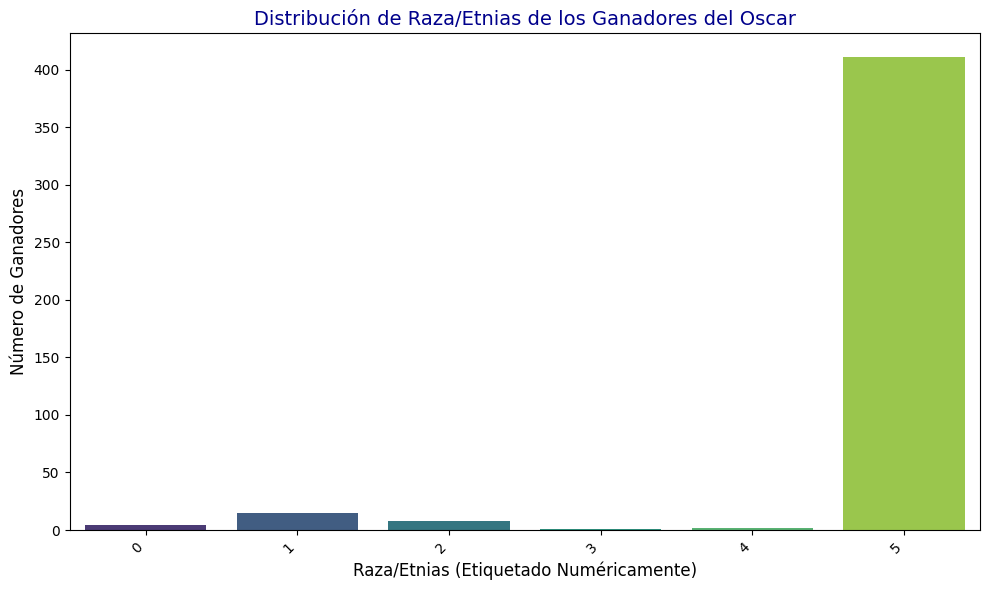

In [19]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='race_ethnicity', palette='viridis')
plt.title('Distribución de Raza/Etnias de los Ganadores del Oscar', fontsize=14, color='darkblue')
plt.xlabel('Raza/Etnias (Etiquetado Numéricamente)', fontsize=12)
plt.ylabel('Número de Ganadores', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

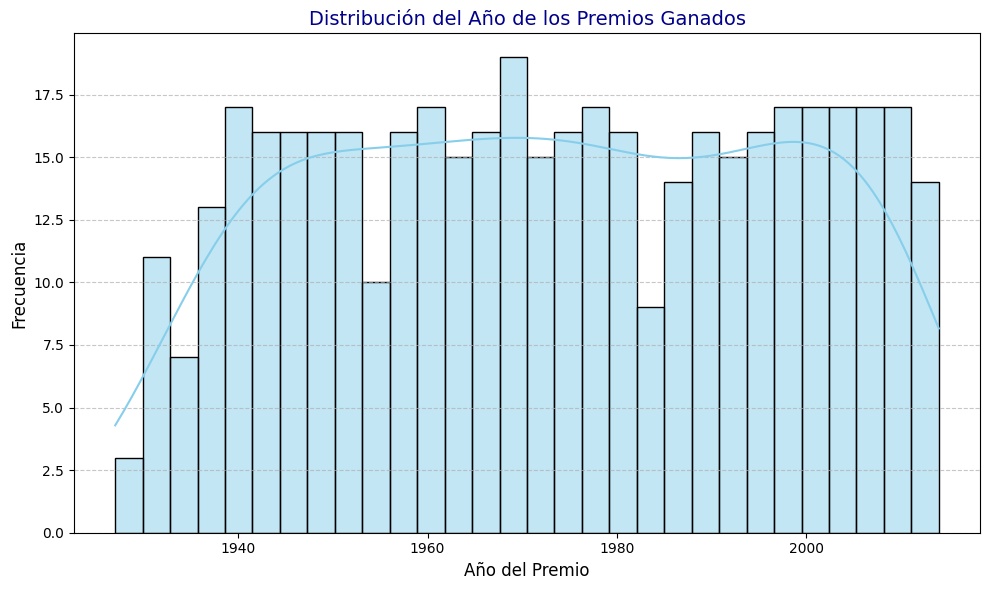

In [20]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='year_of_award', bins=30, kde=True, color='skyblue')
plt.title('Distribución del Año de los Premios Ganados', fontsize=14, color='darkblue')
plt.xlabel('Año del Premio', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

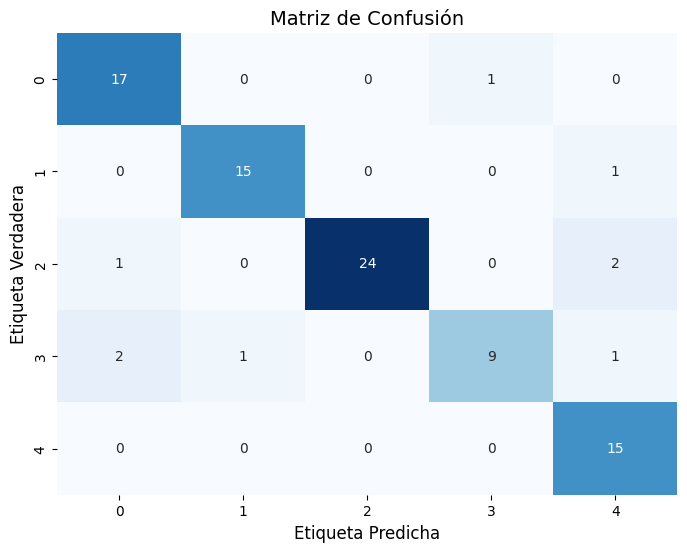

In [23]:
#Matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusión', fontsize=14)
plt.xlabel('Etiqueta Predicha', fontsize=12)
plt.ylabel('Etiqueta Verdadera', fontsize=12)
plt.show()

Según las metricas podemos observar que el modelo muestra un buen rendimiento y tiene una alta precision general y con buenos valores de precisión, F1-score y recall para la mayoría de las clases. También podemos ver que el modelo es capaz de clasificar correctamente la mayoría de los casos.

## Ajustes del modelo

In [24]:
# Definimos los parámetros para el ajuste
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [25]:
# Creamos una instancia de GridSearchCV
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=5,  # Validación cruzada con 5 folds
                           scoring='accuracy',
                           n_jobs=-1) # Usar todos los núcleos disponibles

In [26]:
# Realizamos el ajuste con los datos de entrenamiento
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [27]:
# Mostramos los mejores parámetros encontrados
print("Mejores parámetros:", grid_search.best_params_)

# Mostramos la mejor puntuación de precisión
print("Mejor puntuación de precisión:", grid_search.best_score_)

Mejores parámetros: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 300}
Mejor puntuación de precisión: 0.9035412474849094


In [28]:
# Evaluamos el modelo con los mejores parámetros en el conjunto de prueba
best_model = grid_search.best_estimator_
y_pred_tuned = best_model.predict(X_test)

print("\nInforme de Clasificación (Modelo Tuned):")
print(classification_report(y_test, y_pred_tuned))

print("\nMatriz de Confusión (Modelo Tuned):")
print(confusion_matrix(y_test, y_pred_tuned))


Informe de Clasificación (Modelo Tuned):
              precision    recall  f1-score   support

           0       0.89      0.89      0.89        18
           1       1.00      0.81      0.90        16
           2       1.00      0.89      0.94        27
           3       0.83      0.77      0.80        13
           4       0.68      1.00      0.81        15

    accuracy                           0.88        89
   macro avg       0.88      0.87      0.87        89
weighted avg       0.90      0.88      0.88        89


Matriz de Confusión (Modelo Tuned):
[[16  0  0  2  0]
 [ 0 13  0  0  3]
 [ 1  0 24  0  2]
 [ 1  0  0 10  2]
 [ 0  0  0  0 15]]


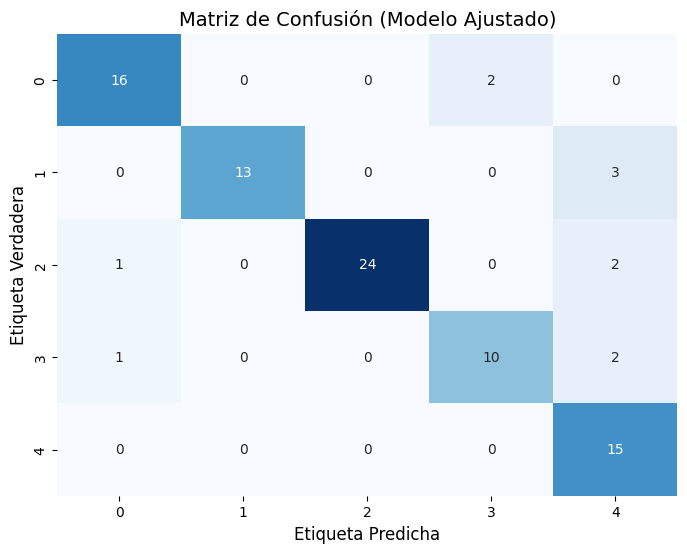

In [30]:
# Visualización de la matriz de confusión para el modelo ajustado
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_tuned), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusión (Modelo Ajustado)', fontsize=14)
plt.xlabel('Etiqueta Predicha', fontsize=12)
plt.ylabel('Etiqueta Verdadera', fontsize=12)
plt.show()

Al hacer el ajuste al modelo, podemos observar que existieron cambios en el rendimiento.
Primero observamos que el accuracy bajó levemente, lo que no necesariamente significa un peor rendimiento, ya que puede ser que las métricas por clase hayan mejorado.
Para la clase 0 la precisión mejoró ligeramente a un 0.89
Para la clase 3 la precisión disminuyó a un 0.83
Para la clase 4 la precisión disminuyó a un 0.68

In [35]:
import joblib
classifier = RandomForestClassifier()
classifier.fit(X, y)

# guardamos
joblib.dump(classifier, "ProyectoModulo7.pkl")

['ProyectoModulo7.pkl']

In [36]:
print(X.columns.tolist())

['_unit_id', '_golden', '_unit_state', '_trusted_judgments', 'birthplace', 'birthplace:confidence', 'date_of_birth', 'date_of_birth:confidence', 'race_ethnicity', 'race_ethnicity:confidence', 'religion', 'religion:confidence', 'sexual_orientation', 'sexual_orientation:confidence', 'year_of_award', 'year_of_award:confidence', 'biourl', 'movie', 'person']


In [38]:
X.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,birthplace,birthplace:confidence,date_of_birth,date_of_birth:confidence,race_ethnicity,race_ethnicity:confidence,religion,religion:confidence,sexual_orientation,sexual_orientation:confidence,year_of_award,year_of_award:confidence,biourl,movie,person
0,670454353,False,0,3,30,1.0,262,1.0,5,1.0,15,1.0,5,1.0000,1927,1.0000,96,320,209
1,670454354,False,0,3,60,1.0,113,1.0,5,1.0,15,1.0,5,0.6842,1930,1.0000,185,245,93
2,670454355,False,0,3,30,1.0,262,1.0,5,1.0,15,1.0,5,1.0000,1931,0.6667,96,21,209
3,670454356,False,0,3,28,1.0,162,1.0,5,1.0,15,1.0,5,1.0000,1932,1.0000,152,212,257
4,670454357,False,0,3,171,1.0,160,1.0,5,1.0,19,1.0,5,1.0000,1933,1.0000,85,34,91


In [45]:
import joblib
classifier = joblib.load("ProyectoModulo7.pkl")

df_prueba = pd.DataFrame([{
    '_unit_id': 670454356,
    '_golden': True,
    '_unit_state': 0,
    '_trusted_judgments': 3,
    'birthplace': 171,
    'birthplace:confidence': 1,
    'date_of_birth': 162,
    'date_of_birth:confidence': 1,
    'race_ethnicity': 5,
    'race_ethnicity:confidence': 1,
    'religion': 15,
    'religion:confidence': 1,
    'sexual_orientation': 5,
    'sexual_orientation:confidence': 1,
    'year_of_award': 1933,
    'year_of_award:confidence': 1,
    'biourl': 85,
    'movie': 212,
    'person': 209
}])

prediccion = classifier.predict(df_prueba)

print("Predicción", prediccion)

Predicción [2]
